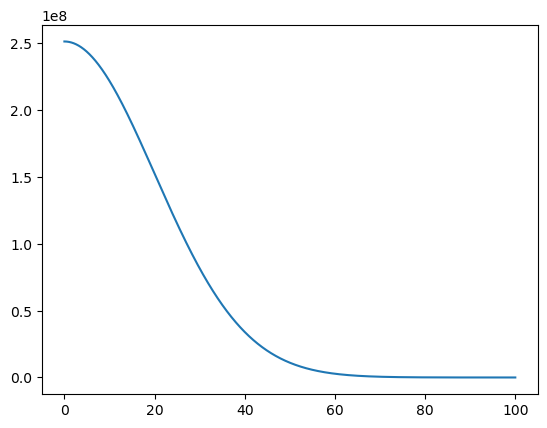

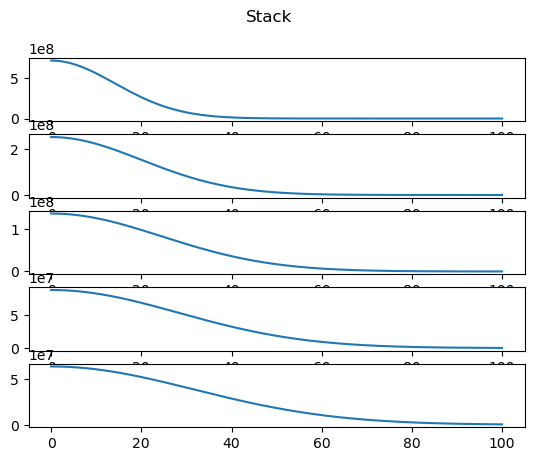

In [1]:
import pandas as pd
import numpy as np

from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

from astropy import units as u
from astropy import coordinates as coord
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.utils.data import get_pkg_data_filename

from urllib.request import urlretrieve


# Define distribution function for constant E. The general 
# modeling space is around 100-200 parsecs. E is constant in 
# this function, resulting in D being constant.

# R = np.linspace(0, 100, 1000);
# t = np.linspace(0, 100, 100);

# R -> The distance from the centre
# t -> The time
# D -> Diffusion coefficient
# E is the energy,no energy is lost in this system

R1 = np.linspace(0, 100, 10000);
t1 = np.linspace(0, 100, 100);
E1 = np.linspace(10000, 1000000000000, 100000)

# R -> The distance from the centre
# t -> The time
# D -> Diffusion coefficient
# E is the energy, no energy is lost in this system

def constantEVar(E, R, t, D):
    delta = 0.45;
    Tpp = 6*(10**7)
    Rdif = 2 * np.sqrt(D * t * (np.exp(t*delta/Tpp)-1)/(t*delta/Tpp))

    N = 1
    alpha = 2.7

    dist = N*(E**-alpha)/((np.pi**(3/2))*(Rdif**3))*np.exp(-((alpha-1)**t)/Tpp-(R**2)/(Rdif**2))

    return dist

    
plt.plot(R1, constantEVar(100000, R1, 2, 100))

fig, axs = plt.subplots(5)
fig.suptitle("Stack")

for i in range (5):
    axs[i].plot(R1, constantEVar(100000, R1, i+1, 100))